In [3]:
from fastai.vision.all import *

# Reloads the exported model for prediction. Critical for decoupling training from deployment.
learn = load_learner('./mnist_sample_classifier.pkl')  # explicitly local

# Optional: inspect vocab
print("Vocab:", learn.dls.vocab)

Vocab: ['3', '7']


In [4]:
from pathlib import Path
import random

path = untar_data(URLs.MNIST_SAMPLE)

# Load 5 random 3s and 5 random 7s
sample_3s = random.sample(list((path/'valid'/'3').ls()), 5)
sample_7s = random.sample(list((path/'valid'/'7').ls()), 5)

sample_images = sample_3s + sample_7s
random.shuffle(sample_images)

In [5]:
results = []

for img_path in sample_images:
    img = PILImage.create(img_path)
    pred, pred_idx, probs = learn.predict(img)
    results.append((img, img_path.parent.name, pred, probs[pred_idx]))

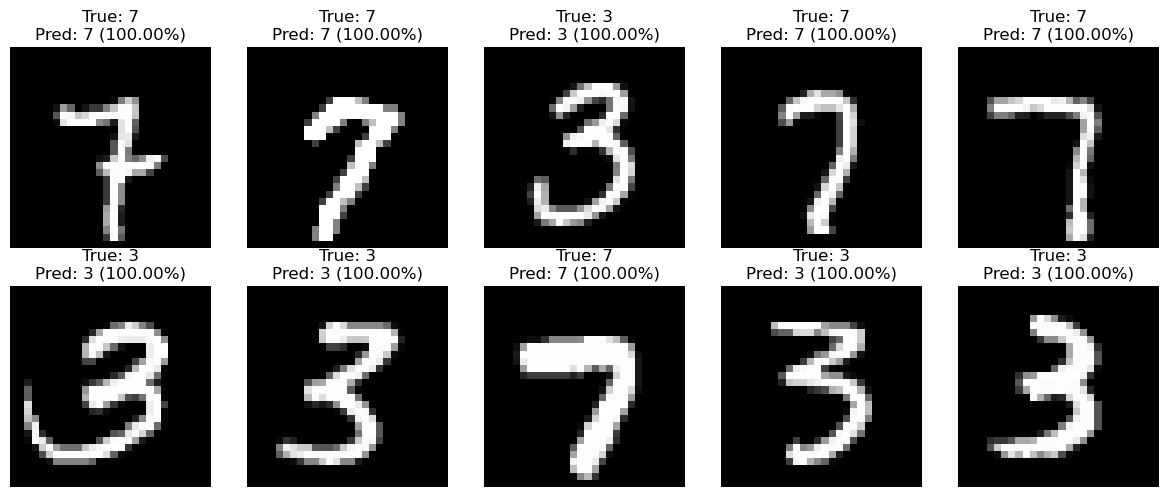

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(12, 5))

for i, (img, true, pred, conf) in enumerate(results):
    ax = axs[i//5, i%5]
    img.show(ctx=ax)
    ax.set_title(f"True: {true}\nPred: {pred} ({conf:.2%})")
    ax.axis('off')

plt.tight_layout()
plt.savefig('../plots/predictions_sample.png')
plt.show()

## Model Prediction Analysis (3 vs 7)

This sample of 10 validation images shows the model's predicted label, true label, and its confidence level for each.

### Performance Summary:
- **100% accuracy** on this sample: all 10 predictions match the true labels.
- Every prediction was made with **100% confidence**, suggesting the model is highly certain on held-out MNIST digits.

### Observed Patterns:
- The model handles both upright and slightly stylized digits (e.g., curled 3s, slanted 7s) with ease.
- It is robust to minor thickness and curvature variations in both classes.
- 7s with shallow crossbars and 3s with tighter top loops were still correctly classified.

### Human-Centered Perspective:
This level of performance suggests the model is highly reliable on digits formatted similarly to the training set (i.e., MNIST-style). For production use with user-drawn sketches, we should still test against out-of-distribution examples — especially thinner strokes, rotated digits, or digits written with non-standard curves.

### Notes:
- All predictions were visually consistent with their true class.
- Sample balance: 5 images of each class, randomly selected.